#Imports

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

In [2]:
uploaded = files.upload()

Saving img_flipped.jpg to img_flipped.jpg
Saving magazines.jpg to magazines.jpg


#Load images

In [6]:
magazines = cv2.imread('magazines.jpg', 0)

magazine = cv2.imread('img_flipped.jpg', 0)

#Image preview

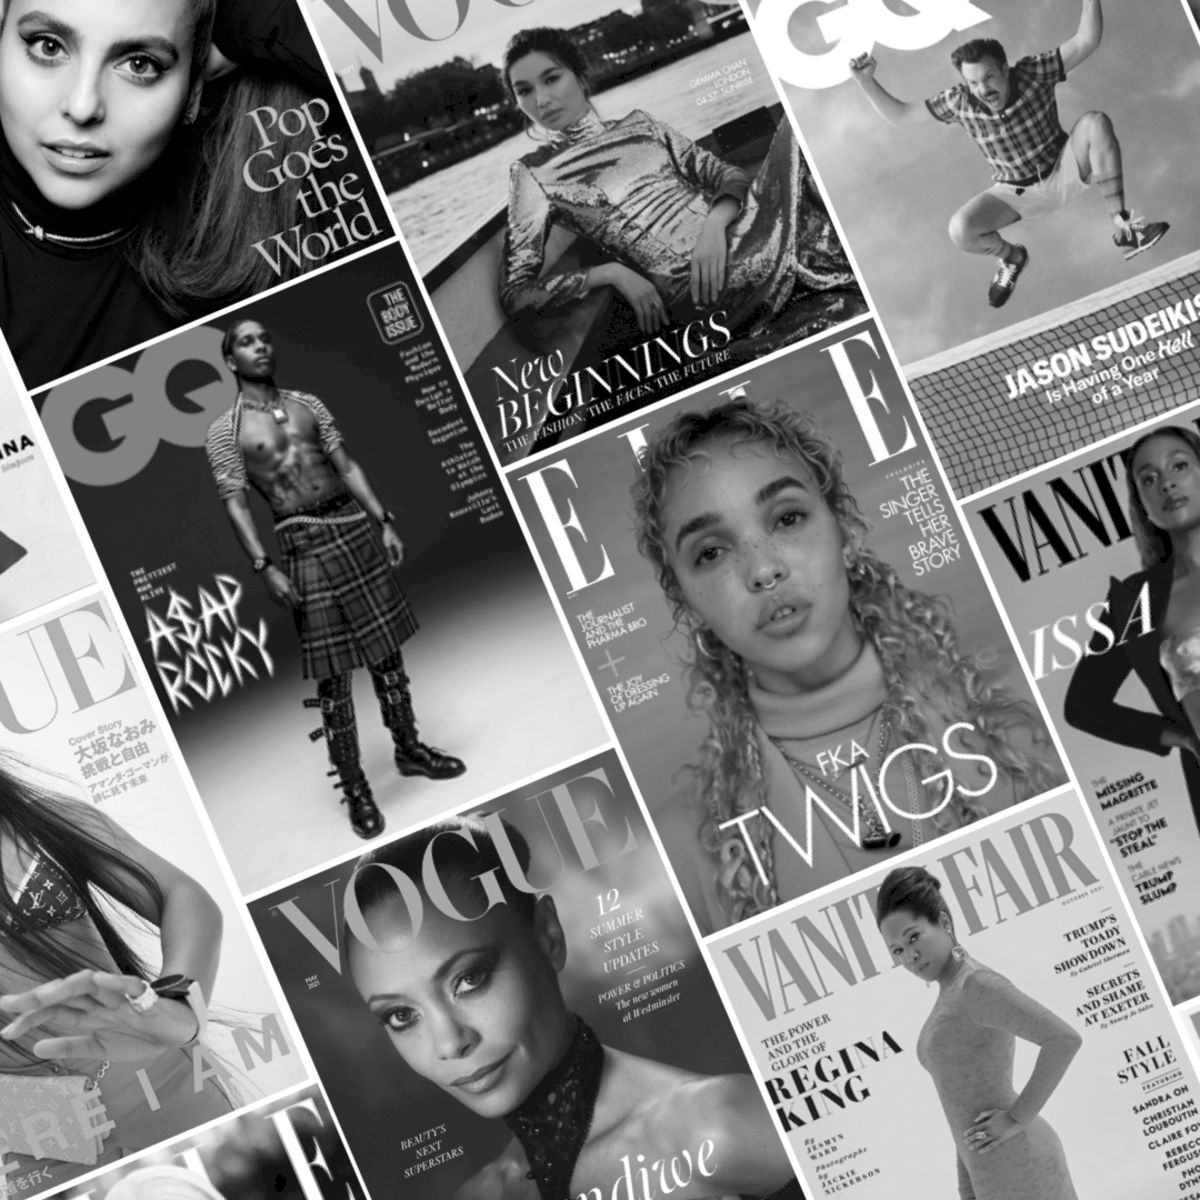

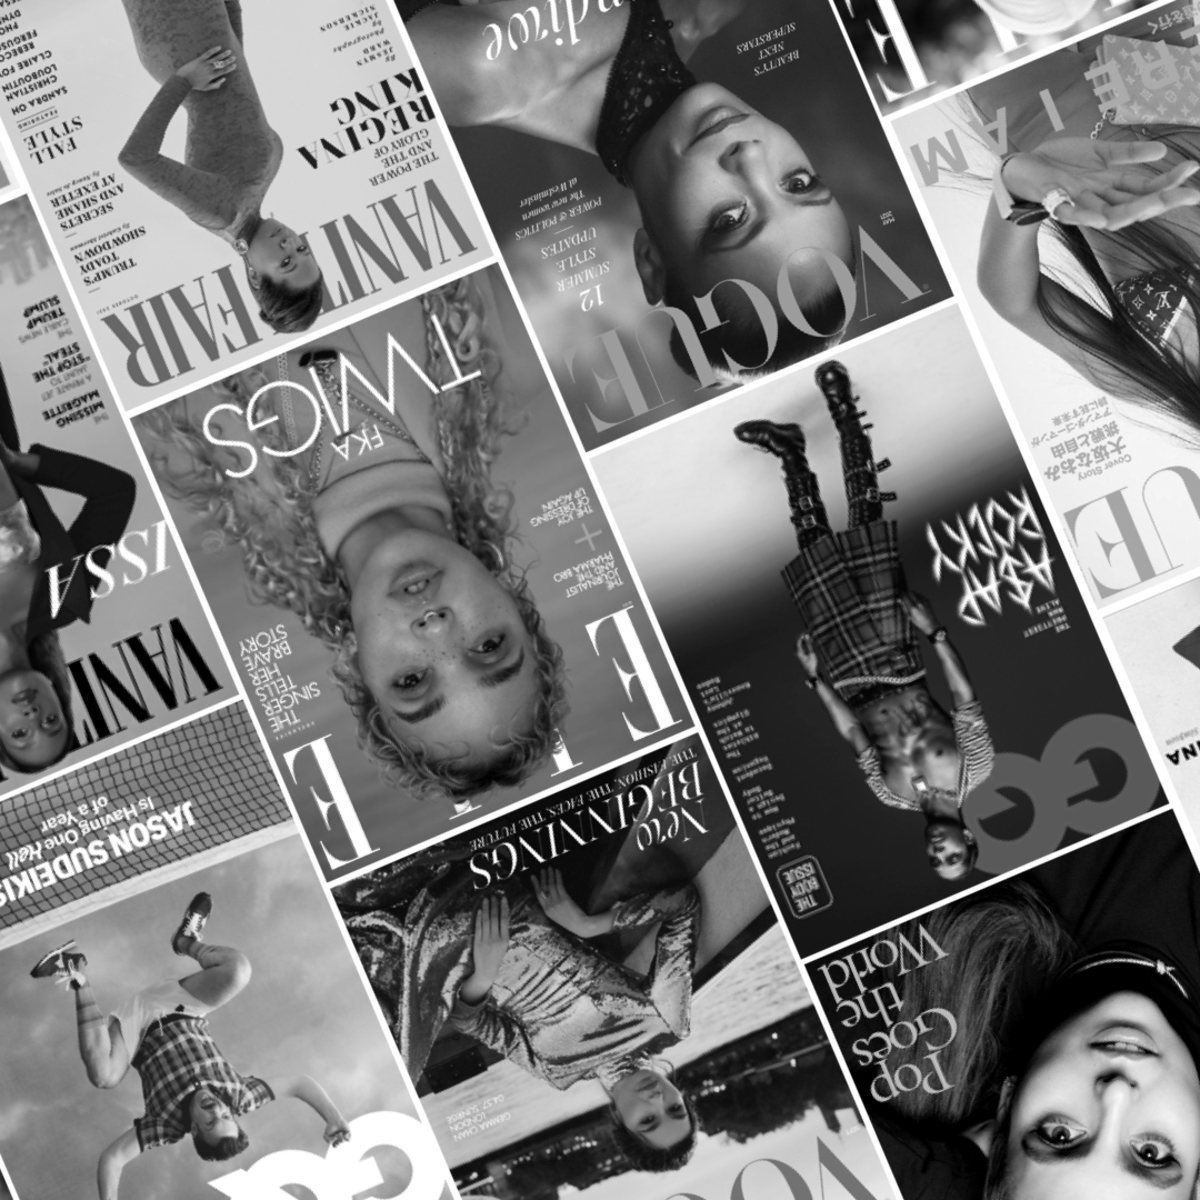

In [8]:
cv2_imshow(magazines)
cv2_imshow(magazine)

#DAISY

In [9]:
def daisy(img1, img2):
    fast = cv2.FastFeatureDetector_create()
    daisy = cv2.xfeatures2d.DAISY_create()

    kps1 = fast.detect(img1)
    kps1, descrs1 = daisy.compute(img1, kps1)

    kps2 = fast.detect(img2)
    kps2, descrs2 = daisy.compute(img2, kps2)

    return kps1, kps2, descrs1, descrs2

#CV2 BFM

In [10]:
def cv2_BFM(kp1, des1, kp2, des2, img1, img2):
    bf = cv2.BFMatcher(cv2.NORM_L1)
    matches = bf.match(des1,des2)

    best_matches = sorted(matches, key=lambda x:x.distance)

    output_image = cv2.drawMatches(img1, kp1, img2, kp2, best_matches[:20], None, flags=2)

    cv2_imshow(output_image)

#Custom BFM

In [11]:
def custom_BFM(kp1, des1, kp2, des2, img1, img2):
    matches = []

    for i, k1 in enumerate(des1):
        min_distance = 9999
        min_index = 0

        for j, k2 in enumerate(des2):
            distance = np.sum(np.abs(k1 - k2))

            if(distance < min_distance):
              min_distance = distance
              min_index = j

        matches.append(cv2.DMatch(_distance=min_distance, _imgIdx=0, _queryIdx=i, _trainIdx=min_index))

    best_matches = sorted(matches, key=lambda x:x.distance)

    output_image = cv2.drawMatches(img1, kp1, img2, kp2, best_matches[:20], None, flags=2)

    cv2_imshow(output_image)

#Results

In [12]:
kp1, kp2, desc1, desc2 = daisy(magazine, magazines)

### CV2 BFM result

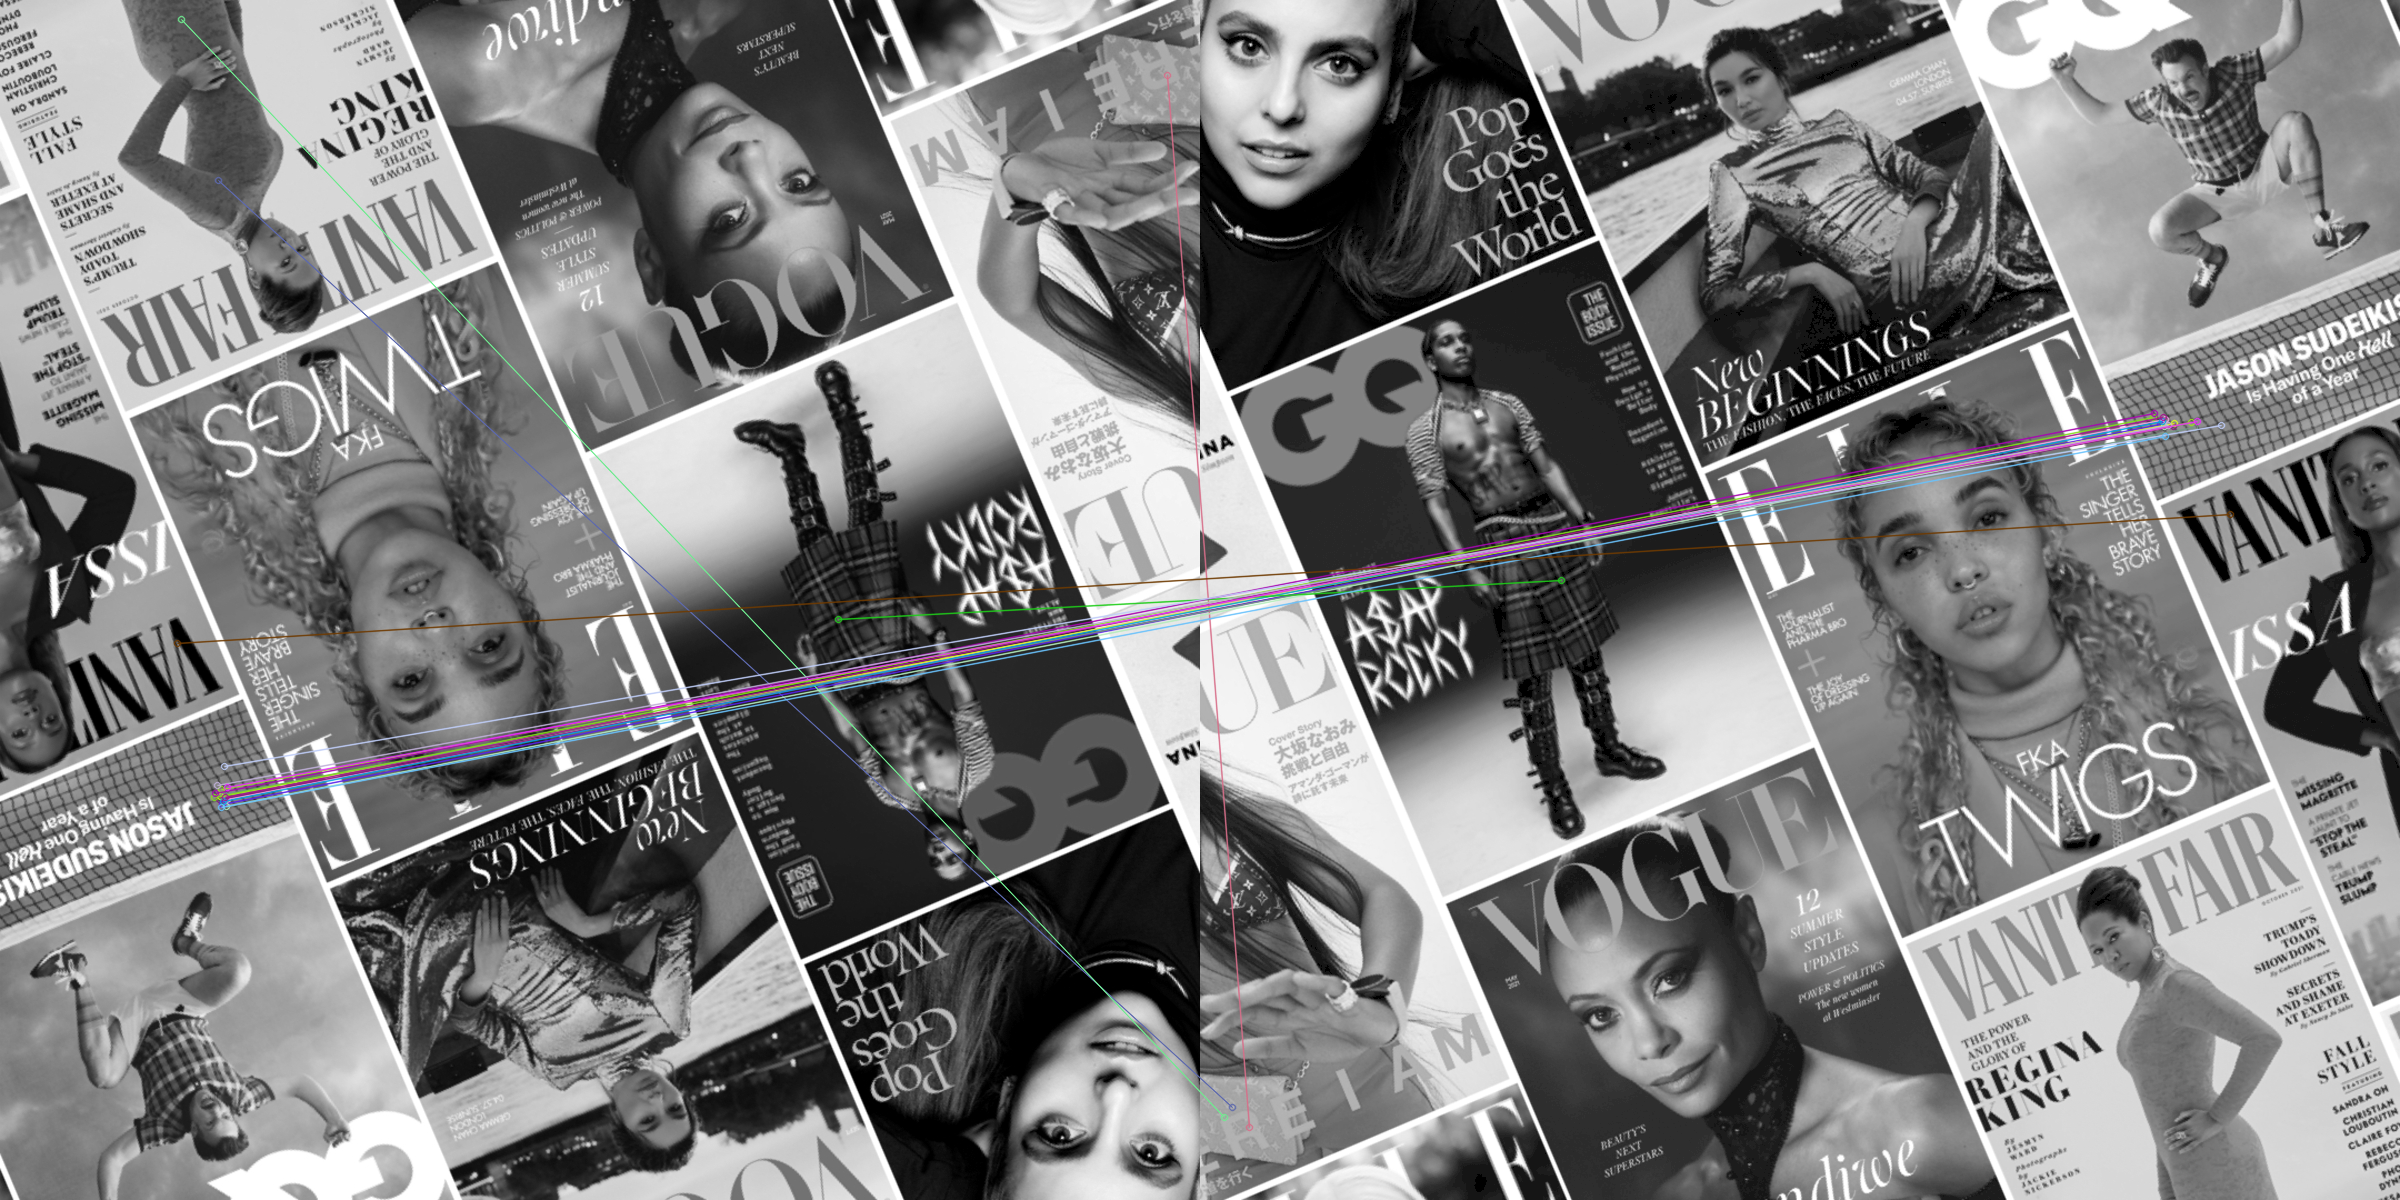

In [13]:
cv2_BFM(kp1, desc1, kp2, desc2, magazine, magazines)

### Custom BFM result

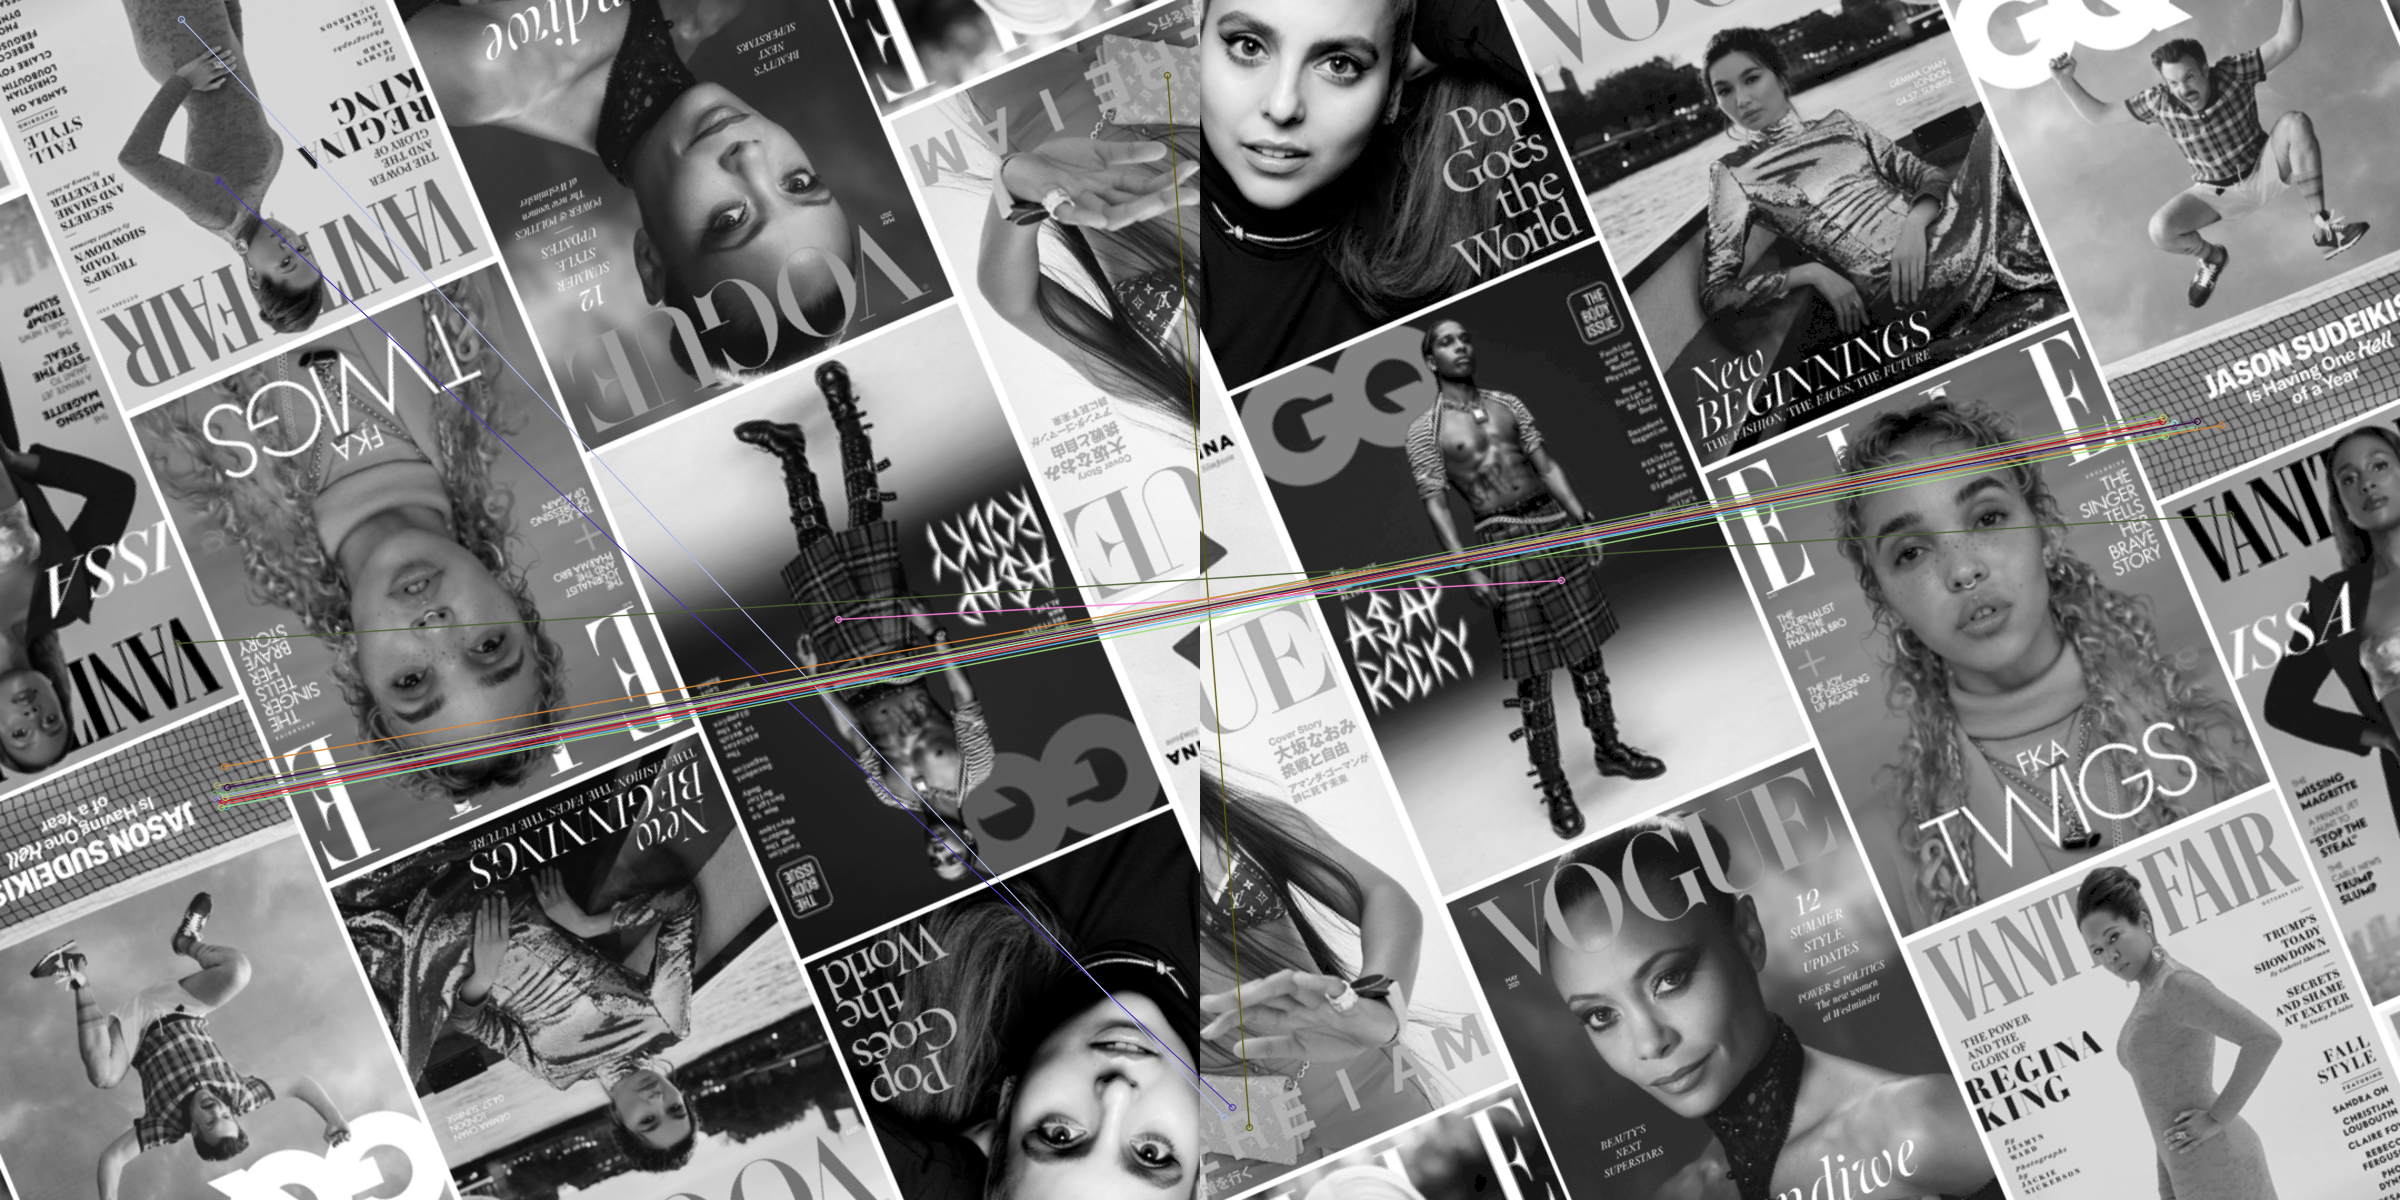

In [15]:
custom_BFM(kp1, desc1, kp2, desc2, magazine, magazines)